In [1]:
# 为了兼容python2和python3
from __future__ import division,print_function,unicode_literals

# 导入相应的包
import numpy as np
import pandas as pd
import os

# 为了保持稳定性一致
np.random.seed(42)

# 画图设置
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import warnings 
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
sns.set_style('darkgrid')                      # darkgrid,whitegrid,dark,white,ticks

In [2]:
import tensorflow as tf
print(tf.__version__)

1.8.0


# 1 Activation functions

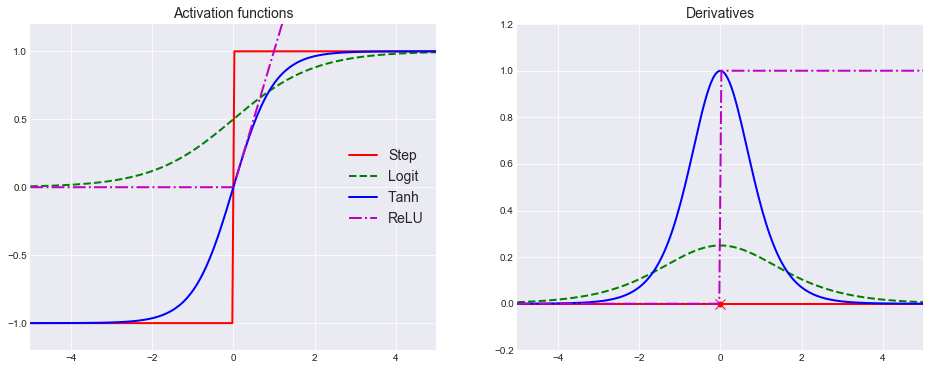

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

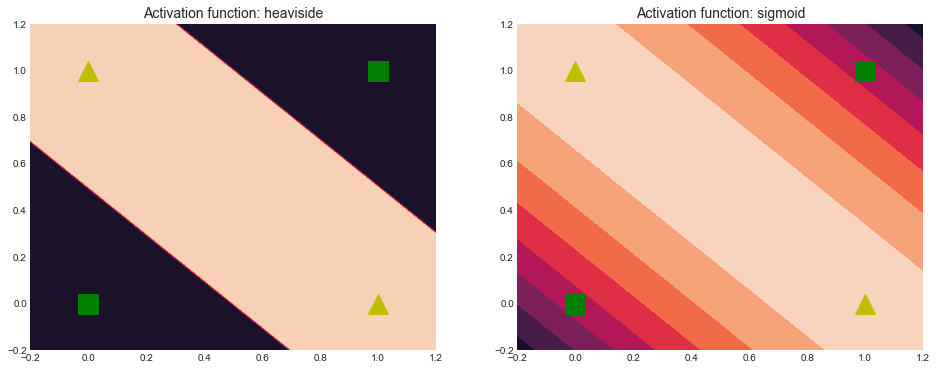

In [4]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# 2 DNN

### Using the Estimator API (formerly tf.contrib.learn)

In [18]:
# 导入数据
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
mnist = loadmat('./datasets/mnist-original.mat')
X,y = mnist['data'].T,mnist['label'].T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.reshape((len(y_train),)).astype(np.int32)
y_test = y_test.reshape((len(y_test),)).astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(51000, 784)
(14000, 784)
(51000,)
(14000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# 训练模型
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], 
                                     n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_train}, 
                                              y=y_train, 
                                              num_epochs=40, 
                                              batch_size=50, 
                                              shuffle=True)

dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmp36z2p201', '_tf_random_seed': None, '_global_id_in_cluster': 0, '_save_summary_steps': 100, '_train_distribute': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015EB918BE48>, '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_is_chief': True, '_session_config': None, '_task_type': 'worker', '_evaluation_master': '', '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_service': None, '_task_id': 0}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ADMINI

INFO:tensorflow:loss = 7.4833393, step = 7200 (0.426 sec)
INFO:tensorflow:global_step/sec: 244.765
INFO:tensorflow:loss = 4.3027945, step = 7300 (0.409 sec)
INFO:tensorflow:global_step/sec: 238.589
INFO:tensorflow:loss = 8.439374, step = 7400 (0.419 sec)
INFO:tensorflow:global_step/sec: 240.717
INFO:tensorflow:loss = 10.253545, step = 7500 (0.415 sec)
INFO:tensorflow:global_step/sec: 246.084
INFO:tensorflow:loss = 25.062473, step = 7600 (0.416 sec)
INFO:tensorflow:global_step/sec: 227.949
INFO:tensorflow:loss = 8.274286, step = 7700 (0.429 sec)
INFO:tensorflow:global_step/sec: 248.498
INFO:tensorflow:loss = 7.754035, step = 7800 (0.412 sec)
INFO:tensorflow:global_step/sec: 237.386
INFO:tensorflow:loss = 7.3967934, step = 7900 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.985
INFO:tensorflow:loss = 10.668194, step = 8000 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.947
INFO:tensorflow:loss = 6.846483, step = 8100 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.718
INFO:tensorflo

INFO:tensorflow:loss = 6.9226427, step = 15500 (0.435 sec)
INFO:tensorflow:global_step/sec: 239.444
INFO:tensorflow:loss = 3.0343742, step = 15600 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.858
INFO:tensorflow:loss = 3.4487438, step = 15700 (0.427 sec)
INFO:tensorflow:global_step/sec: 240.519
INFO:tensorflow:loss = 4.146303, step = 15800 (0.406 sec)
INFO:tensorflow:global_step/sec: 238.276
INFO:tensorflow:loss = 5.0922084, step = 15900 (0.420 sec)
INFO:tensorflow:global_step/sec: 236.31
INFO:tensorflow:loss = 2.1969535, step = 16000 (0.423 sec)
INFO:tensorflow:global_step/sec: 239.93
INFO:tensorflow:loss = 3.5927737, step = 16100 (0.417 sec)
INFO:tensorflow:global_step/sec: 249.971
INFO:tensorflow:loss = 8.504893, step = 16200 (0.410 sec)
INFO:tensorflow:global_step/sec: 234.478
INFO:tensorflow:loss = 11.996589, step = 16300 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.913
INFO:tensorflow:loss = 7.842226, step = 16400 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.29
INFO:t

INFO:tensorflow:global_step/sec: 218.223
INFO:tensorflow:loss = 9.622901, step = 23800 (0.452 sec)
INFO:tensorflow:global_step/sec: 197.885
INFO:tensorflow:loss = 1.3906631, step = 23900 (0.501 sec)
INFO:tensorflow:global_step/sec: 200.08
INFO:tensorflow:loss = 7.444234, step = 24000 (0.500 sec)
INFO:tensorflow:global_step/sec: 229.413
INFO:tensorflow:loss = 3.5460513, step = 24100 (0.440 sec)
INFO:tensorflow:global_step/sec: 230.27
INFO:tensorflow:loss = 12.777475, step = 24200 (0.430 sec)
INFO:tensorflow:global_step/sec: 226.418
INFO:tensorflow:loss = 4.4213543, step = 24300 (0.445 sec)
INFO:tensorflow:global_step/sec: 210.698
INFO:tensorflow:loss = 4.815179, step = 24400 (0.472 sec)
INFO:tensorflow:global_step/sec: 177.103
INFO:tensorflow:loss = 2.5509794, step = 24500 (0.565 sec)
INFO:tensorflow:global_step/sec: 222.173
INFO:tensorflow:loss = 9.247589, step = 24600 (0.453 sec)
INFO:tensorflow:global_step/sec: 217.865
INFO:tensorflow:loss = 19.40908, step = 24700 (0.459 sec)
INFO:te

INFO:tensorflow:loss = 1.436913, step = 32000 (0.425 sec)
INFO:tensorflow:global_step/sec: 242.558
INFO:tensorflow:loss = 1.1915833, step = 32100 (0.402 sec)
INFO:tensorflow:global_step/sec: 249.999
INFO:tensorflow:loss = 8.025927, step = 32200 (0.410 sec)
INFO:tensorflow:global_step/sec: 230.268
INFO:tensorflow:loss = 3.8479428, step = 32300 (0.424 sec)
INFO:tensorflow:global_step/sec: 239.607
INFO:tensorflow:loss = 4.6043773, step = 32400 (0.417 sec)
INFO:tensorflow:global_step/sec: 237.168
INFO:tensorflow:loss = 3.2845533, step = 32500 (0.422 sec)
INFO:tensorflow:global_step/sec: 234.031
INFO:tensorflow:loss = 9.954079, step = 32600 (0.427 sec)
INFO:tensorflow:global_step/sec: 246.414
INFO:tensorflow:loss = 1.8002613, step = 32700 (0.408 sec)
INFO:tensorflow:global_step/sec: 249.175
INFO:tensorflow:loss = 8.624277, step = 32800 (0.399 sec)
INFO:tensorflow:global_step/sec: 243.905
INFO:tensorflow:loss = 4.4600387, step = 32900 (0.410 sec)
INFO:tensorflow:global_step/sec: 238.039
INFO

INFO:tensorflow:global_step/sec: 246.28
INFO:tensorflow:loss = 4.7362146, step = 40300 (0.416 sec)
INFO:tensorflow:global_step/sec: 233.549
INFO:tensorflow:loss = 2.80846, step = 40400 (0.428 sec)
INFO:tensorflow:global_step/sec: 243.04
INFO:tensorflow:loss = 8.669714, step = 40500 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.662
INFO:tensorflow:loss = 1.1815134, step = 40600 (0.404 sec)
INFO:tensorflow:global_step/sec: 247.138
INFO:tensorflow:loss = 2.4746342, step = 40700 (0.415 sec)
INFO:tensorflow:Saving checkpoints for 40800 into C:\Users\ADMINI~1\AppData\Local\Temp\tmp36z2p201\model.ckpt.
INFO:tensorflow:Loss for final step: 1.6220399.


In [20]:
# 测试模型
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-24-12:12:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmp36z2p201\model.ckpt-40800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-24-12:12:22
INFO:tensorflow:Saving dict for global step 40800: accuracy = 0.9442857, average_loss = 0.33468914, global_step = 40800, loss = 42.596798


In [21]:
eval_results

{'accuracy': 0.9442857,
 'average_loss': 0.33468914,
 'global_step': 40800,
 'loss': 42.596798}

In [22]:
# 做预测
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmp36z2p201\model.ckpt-40800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([45.86209 , 24.406675, 88.505684, 57.720345, 30.612404, 55.16527 ,
        48.97031 , 92.520485, 64.187126, 83.24077 ], dtype=float32),
 'probabilities': array([5.3543845e-21, 2.5747897e-30, 1.7725015e-02, 7.5628173e-16,
        1.2760114e-27, 5.8752938e-17, 1.1983730e-19, 9.8218334e-01,
        4.8659899e-13, 9.1635316e-05], dtype=float32)}

### Using dense()

In [23]:
# 导入数据
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
mnist = loadmat('./datasets/mnist-original.mat')
X,y = mnist['data'].T,mnist['label'].T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.reshape((len(y_train),)).astype(np.int32)
y_test = y_test.reshape((len(y_test),)).astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(51000, 784)
(14000, 784)
(51000,)
(14000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 40
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_DNN.ckpt")

0 Batch accuracy: 0.08 Validation accuracy: 0.1074
1 Batch accuracy: 0.08 Validation accuracy: 0.1074
2 Batch accuracy: 0.04 Validation accuracy: 0.1074
3 Batch accuracy: 0.14 Validation accuracy: 0.1074
4 Batch accuracy: 0.1 Validation accuracy: 0.1074
5 Batch accuracy: 0.1 Validation accuracy: 0.1074
6 Batch accuracy: 0.14 Validation accuracy: 0.1074
7 Batch accuracy: 0.1 Validation accuracy: 0.1074
8 Batch accuracy: 0.1 Validation accuracy: 0.1074
9 Batch accuracy: 0.18 Validation accuracy: 0.1074
10 Batch accuracy: 0.16 Validation accuracy: 0.1074
11 Batch accuracy: 0.14 Validation accuracy: 0.1074
12 Batch accuracy: 0.0 Validation accuracy: 0.1074
13 Batch accuracy: 0.06 Validation accuracy: 0.1074
14 Batch accuracy: 0.12 Validation accuracy: 0.1074
15 Batch accuracy: 0.04 Validation accuracy: 0.1074
16 Batch accuracy: 0.06 Validation accuracy: 0.1074
17 Batch accuracy: 0.08 Validation accuracy: 0.1074
18 Batch accuracy: 0.08 Validation accuracy: 0.1074
19 Batch accuracy: 0.14 Val

In [25]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_DNN.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_DNN.ckpt


In [26]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual classes:    [7 8 6 5 7 1 3 3 0 9 4 5 0 2 0 5 0 5 3 1]


## 完整版

In [27]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

if __name__ == '__main__':
    n_inputs = 28 * 28
    n_hidden1 = 300
    n_hidden2 = 100
    n_outputs = 10
    
    mnist = loadmat('./datasets/mnist-original.mat')
    X,y = mnist['data'].T,mnist['label'].T
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.reshape((len(y_train),)).astype(np.int32)
    y_test = y_test.reshape((len(y_test),)).astype(np.int32)
    X_valid, X_train = X_train[:5000], X_train[5000:]
    y_valid, y_train = y_train[:5000], y_train[5000:]

    X = tf.placeholder(tf.float32, shape= (None, n_inputs), name='X')
    y = tf.placeholder(tf.int64, shape=(None), name = 'y')

    with tf.name_scope('dnn'):
        hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,name= 'hidden1',reuse=True)

        hidden2 = tf.layers.dense(hidden1, n_hidden2, name='hidden2',activation= tf.nn.relu,reuse=True)

        logits = tf.layers.dense(hidden2, n_outputs, name='outputs',reuse=True)

    with tf.name_scope('loss'):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y,logits = logits)
        loss = tf.reduce_mean(xentropy, name='loss')            #所有值求平均

    learning_rate = 0.01
    with tf.name_scope('train'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        training_op = optimizer.minimize(loss)

    with tf.name_scope('eval'):
        correct = tf.nn.in_top_k(logits ,y ,1)                  #是否与真值一致 返回布尔值
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) #tf.cast将数据转化为0,1序列

    init = tf.global_variables_initializer()

    n_epochs = 20
    batch_size = 50
    
    with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
            for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

0 Batch accuracy: 0.06 Validation accuracy: 0.1074
1 Batch accuracy: 0.08 Validation accuracy: 0.1074
2 Batch accuracy: 0.1 Validation accuracy: 0.1074
3 Batch accuracy: 0.06 Validation accuracy: 0.1074
4 Batch accuracy: 0.1 Validation accuracy: 0.1074
5 Batch accuracy: 0.08 Validation accuracy: 0.1074
6 Batch accuracy: 0.12 Validation accuracy: 0.1074
7 Batch accuracy: 0.08 Validation accuracy: 0.1074
8 Batch accuracy: 0.18 Validation accuracy: 0.1074
9 Batch accuracy: 0.1 Validation accuracy: 0.1074
10 Batch accuracy: 0.06 Validation accuracy: 0.1074
11 Batch accuracy: 0.12 Validation accuracy: 0.1074
12 Batch accuracy: 0.12 Validation accuracy: 0.1074
13 Batch accuracy: 0.14 Validation accuracy: 0.1074
14 Batch accuracy: 0.12 Validation accuracy: 0.1074
15 Batch accuracy: 0.14 Validation accuracy: 0.1074
16 Batch accuracy: 0.12 Validation accuracy: 0.1074
17 Batch accuracy: 0.16 Validation accuracy: 0.1074
18 Batch accuracy: 0.08 Validation accuracy: 0.1074
19 Batch accuracy: 0.12 V